## Potatao Disease Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
Batch_size = 32
Image_size = 256
channels = 3
Epochs = 30 

In [5]:
Img_data = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle = True,
    image_size = (Image_size, Image_size),
    batch_size = Batch_size
   )

Found 2152 files belonging to 3 classes.


In [6]:
cls_names = Img_data.class_names
cls_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

### Visualise some of the images from the dataset

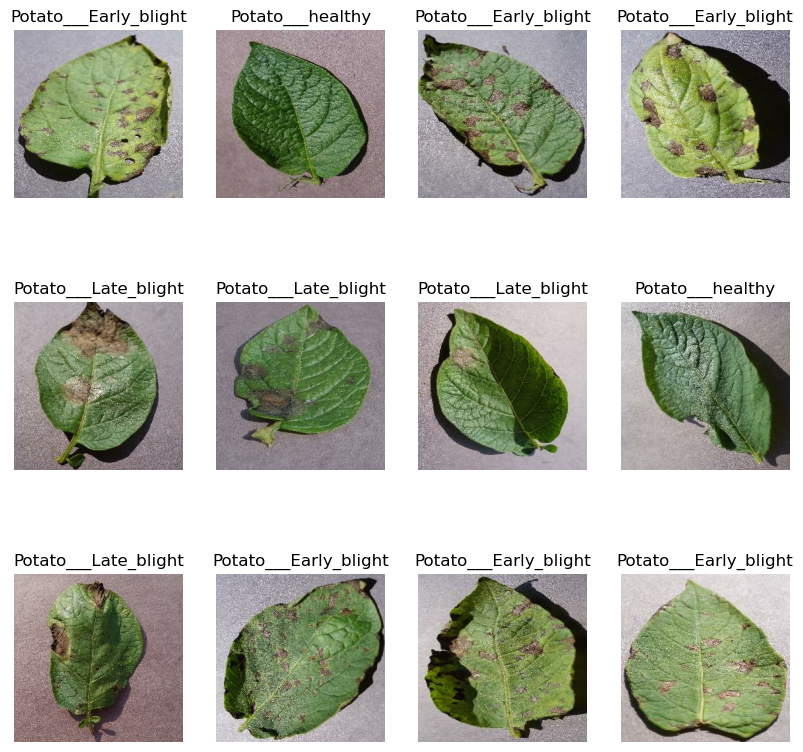

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in Img_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(cls_names[labels_batch[i]])
        plt.axis("off")

In [13]:
train_size = 0.8
len(Img_data)*train_size

54.400000000000006

In [14]:
train_ds = Img_data.take(54)
len(train_ds)

54

In [15]:
test_ds = Img_data.skip(54)
len(test_ds)


14

In [16]:
val_size=0.1
len(Img_data)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [19]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(Img_data)

In [23]:
print(f"Training data size : {len(train_ds)}")

print("\n")

print(f"Validation data size : {len(val_ds)}")

print("\n")

print(f"Test data size : {len(test_ds)}")

Training data size : 54


Validation data size : 6


Test data size : 8


### Cache, Shuffle, and Prefetch the Dataset

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Building the Model

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(Image_size, Image_size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
input_shape = (Batch_size, Image_size, Image_size, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

### Compiling the Model

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=Epochs,
)

Epoch 1/30


54/54 [==============================] - 92s 2s/step - loss: 0.9003 - accuracy: 0.5122 - val_loss: 0.7690 - val_accuracy: 0.7344
Epoch 2/30
54/54 [==============================] - 86s 2s/step - loss: 0.5904 - accuracy: 0.7587 - val_loss: 0.4206 - val_accuracy: 0.8021
Epoch 3/30
54/54 [==============================] - 87s 2s/step - loss: 0.3722 - accuracy: 0.8542 - val_loss: 0.3140 - val_accuracy: 0.8802
Epoch 4/30
54/54 [==============================] - 82s 2s/step - loss: 0.3635 - accuracy: 0.8675 - val_loss: 0.2206 - val_accuracy: 0.8854
Epoch 5/30
54/54 [==============================] - 87s 2s/step - loss: 0.2845 - accuracy: 0.8935 - val_loss: 0.1847 - val_accuracy: 0.9062
Epoch 6/30
54/54 [==============================] - 88s 2s/step - loss: 0.1703 - accuracy: 0.9317 - val_loss: 0.0951 - val_accuracy: 0.9635
Epoch 7/30
54/54 [==============================] - 79s 1s/step - loss: 0.1186 - accuracy: 0.9578 - val_loss: 0.0839 - val_accuracy: 0.9635
Epoch 8/30
54/54 [

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 301ms/step - loss: 0.0106 - accuracy: 0.9961


In [32]:
scores

[0.010575889609754086, 0.99609375]

In [35]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

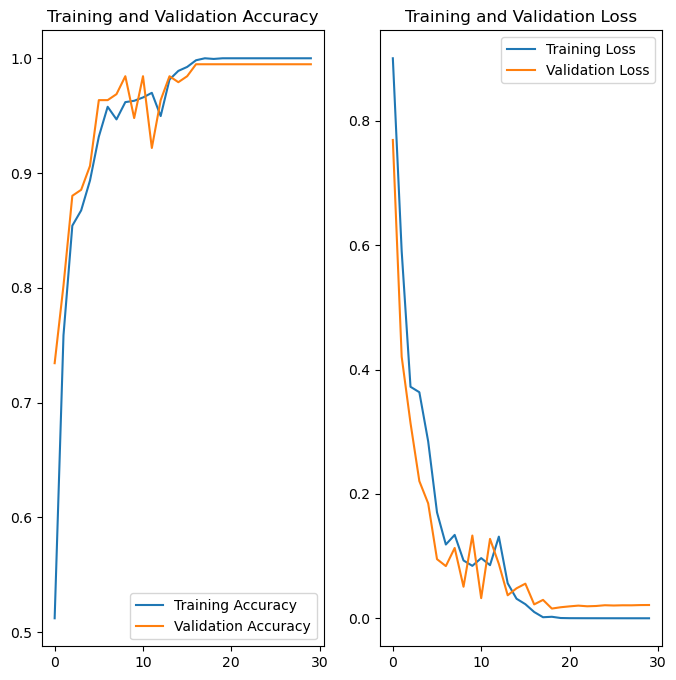

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 535ms/step
predicted label: Potato___Early_blight


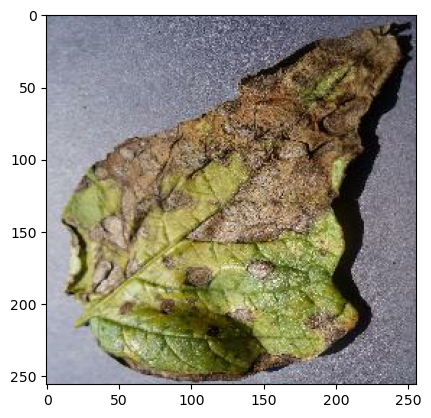

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",cls_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",cls_names[np.argmax(batch_prediction[0])])